In [45]:
import calendar

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
sns.set_context("paper", font_scale= 1.5)

In [46]:
data = pd.read_csv('road_accidents_2020.csv')
data.head()

/Users/vivianetrindade/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,10219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,10220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,10228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,10228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,10228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [48]:
data.isnull().sum().any


<bound method NDFrame._add_numeric_operations.<locals>.any of accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                     

In [49]:
data.dropna()
#data.columns

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,10219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,10220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,10228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,10228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,10228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [50]:
data.dtypes

accident_index                                  object
accident_year                                    int64
accident_reference                              object
location_easting_osgr                          float64
location_northing_osgr                         float64
longitude                                      float64
latitude                                       float64
police_force                                     int64
accident_severity                                int64
number_of_vehicles                               int64
number_of_casualties                             int64
date                                            object
day_of_week                                      int64
time                                            object
local_authority_district                         int64
local_authority_ons_district                    object
local_authority_highway                         object
first_road_class                                 int64
first_road

In [51]:
data['date']= pd.to_datetime(data['date']+' '+data['time'])
data['date'].head()


0   2020-04-02 09:00:00
1   2020-04-27 13:55:00
2   2020-01-01 01:25:00
3   2020-01-01 01:50:00
4   2020-01-01 02:25:00
Name: date, dtype: datetime64[ns]

In [52]:
data.drop(['time','day_of_week', 'accident_year'], axis=1,inplace=True)
data.dtypes

accident_index                                         object
accident_reference                                     object
location_easting_osgr                                 float64
location_northing_osgr                                float64
longitude                                             float64
latitude                                              float64
police_force                                            int64
accident_severity                                       int64
number_of_vehicles                                      int64
number_of_casualties                                    int64
date                                           datetime64[ns]
local_authority_district                                int64
local_authority_ons_district                           object
local_authority_highway                                object
first_road_class                                        int64
first_road_number                                       int64
road_typ

In [53]:
#search for duplicates
data.duplicated().sum()

0

In [54]:
#create dataset with only major accidents
major_accidents = data[data['number_of_casualties']>=3]
major_accidents.head()

,accident_index,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
11,2020010228024,10228024,534377.0,197476.0,-0.058620,51.660013,1,2,3,4,...,5,4,1,2,0,0,1,1,2,E01001516
136,2020010228521,10228521,532575.0,192555.0,-0.086520,51.616219,1,3,1,4,...,9,4,1,1,0,0,1,3,2,E01001560
173,2020010228625,10228625,525791.0,174972.0,-0.190729,51.459756,1,3,3,3,...,0,1,1,1,0,0,1,1,2,E01004509
187,2020010228670,10228670,551891.0,177755.0,0.185884,51.478366,1,3,2,3,...,0,1,1,1,0,0,1,1,2,E01000429
212,2020010228789,10228789,521293.0,185302.0,-0.251891,51.553577,1,2,2,4,...,0,4,1,1,6,0,1,1,2,E01000601


In [55]:
#verifying the shape
major_accidents.shape

(4817, 33)

In [56]:
import calendar

#number of accidents per month
accidents_month=major_accidents.groupby(major_accidents['date'].dt.month).count().date

#Replace the integer months by month names
accidents_month.index=[calendar.month_name[x] for x in range(1,13)]

accidents_month

January      519
February     471
March        283
April        222
May          329
June         417
July         458
August       481
September    459
October      437
November     388
December     353
Name: date, dtype: int64

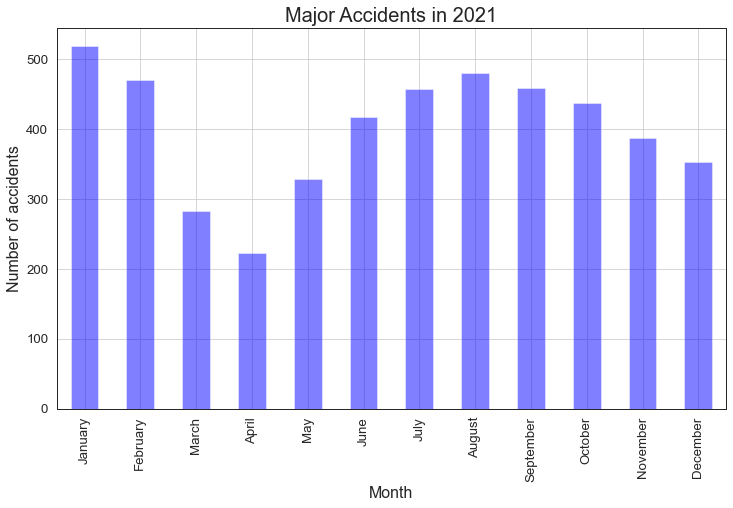

In [57]:
# plot accidents per month
accidents_month.plot(kind='bar', figsize=(12,7), color='blue', alpha=0.5)

#title and x,y labels
plt.title('Major Accidents in 2021', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.grid(True)
plt.show()

The graph show that the major accidents occur in the first two month of the year and between June and August has also
an increase.

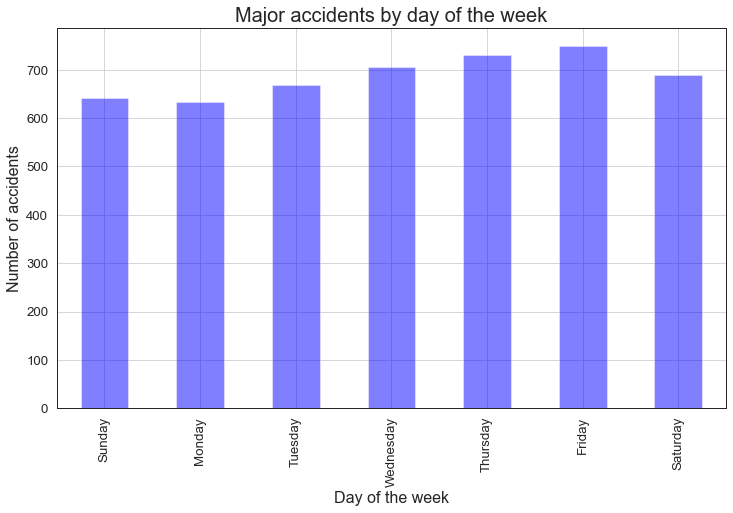

In [58]:
#number of accidents per day of the week
accidents_day=major_accidents.groupby(major_accidents['date'].dt.dayofweek).count().date

#replace the day integers by day names
labels=('Sunday','Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday')
accidents_day.index=[labels[x] for x in range(0,7)]

#plot accidents per day
accidents_day.plot(kind='bar', figsize=(12,7), color='blue', alpha=0.5)

#title and x,y labels
plt.title('Major accidents by day of the week', fontsize=20)
plt.xlabel('Day of the week', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.grid(True)


As show in the plot above, the major accidents occur between Wednesday and Friday evolving more of 700 car accidents per day,
including Friday.


/var/folders/j2/p_v4t1wx69bdbtykcjvpyctw0000gn/T/ipykernel_74460/2265603487.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  major_accidents['timebin']= pd.cut(major_accidents['date'].dt.hour, bins, labels=labels, right= False)


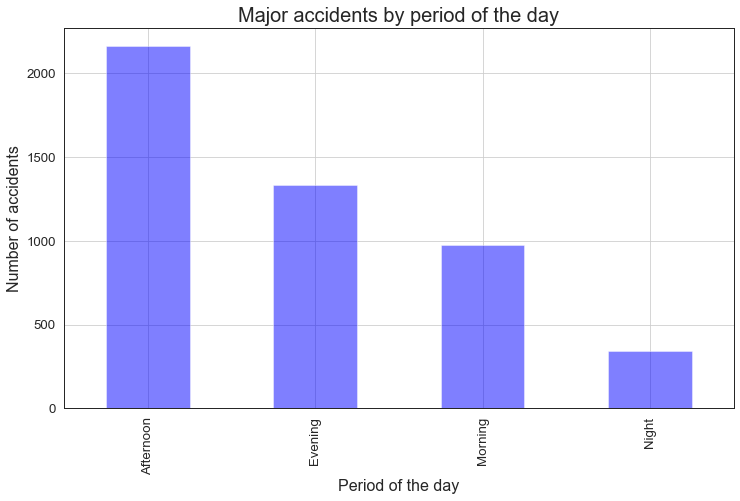

In [59]:
#create a time bin
bins = [0,6,12,18,24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
major_accidents['timebin']= pd.cut(major_accidents['date'].dt.hour, bins, labels=labels, right= False)


#plot accidents per period
major_accidents['timebin'].value_counts().plot(kind='bar', figsize=(12,7), color='blue', alpha=0.5)

#title and x,y labels
plt.title('Major accidents by period of the day', fontsize=20)
plt.xlabel('Period of the day', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.grid(True)
plt.show()

The accidents mostly occur in the afternoon representing almost half of all major accidents. The second period with more
major accidents is in the Evening following for morning and night.

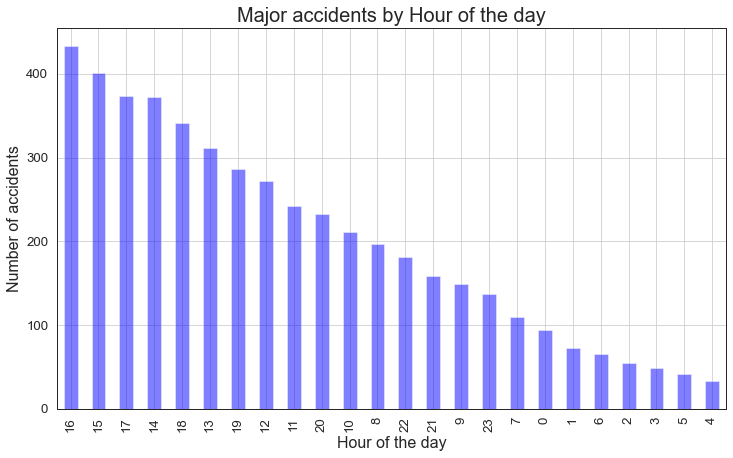

In [60]:
#plot accidents per hour
major_accidents['date'].dt.hour.value_counts().plot(kind='bar', figsize=(12,7), color='blue', alpha=0.5)

#title and x,y labels
plt.title('Major accidents by Hour of the day', fontsize=20)
plt.xlabel('Hour of the day', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.grid(True)
plt.show()

Confirming the previous graph the period of most accidents is  in the afternoon (12:00 - 18:00) with a major concentration
on 16:00 and 15:00.

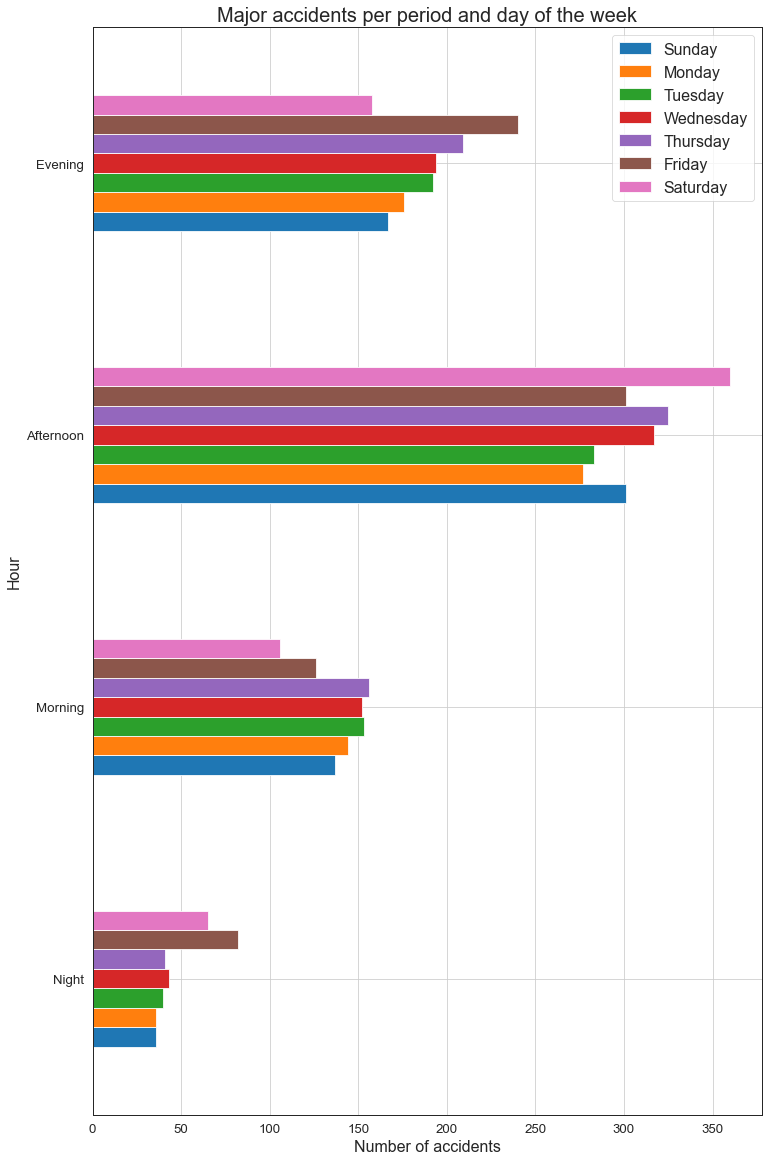

In [61]:
#number of accidents per hour and day
accidents_hour_day= major_accidents.groupby([major_accidents['timebin'].rename('period'), major_accidents['date'].dt.dayofweek.rename('day')]).count().date

#plot accidents per hour and day
accidents_hour_day.unstack().plot(kind='barh', figsize=(12,20))

#title and x,y labels
labels=('Sunday','Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday')
plt.legend([labels[x] for x in range(0,7)], fontsize=16)
plt.title('Major accidents per period and day of the week', fontsize=20)
plt.xlabel('Number of accidents', fontsize=16)
plt.ylabel('Hour', fontsize=16)
plt.grid(True)

On evening most major accidents occur on Friday following by Thursday. In the Afternoon most accidents occur Saturday
following by Thursday and Wednesday.

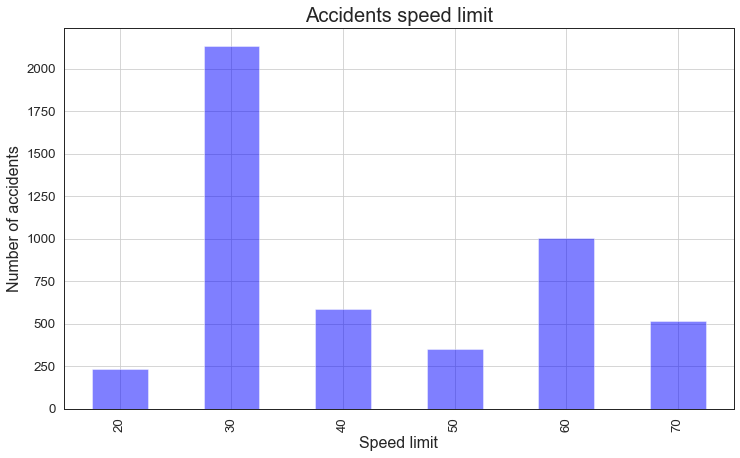

In [62]:
#verify speed limits conditions
speed_limit=major_accidents.groupby(major_accidents['speed_limit']).count().number_of_vehicles

#plot accidents by light conditions
speed_limit.plot(kind='bar', figsize=(12,7), color='blue', alpha=0.5)

#title and x, y labels
plt.title('Accidents speed limit', fontsize=20)
plt.xlabel('Speed limit', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.grid(True)

Most of the major accidents happened in the speed limit of 30 km/h.

In [63]:
#replace road type integer to string
roadtype_to_string={1:'Roundabout', 2:'One way street', 3:'Dual carrigeway', 6:'Single carrigeway', 7:'Slip road', 9:'Unknown'}
major_accidents['road_type'].replace(roadtype_to_string, inplace=True)
major_accidents['road_type'].head()

/Users/vivianetrindade/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


11       Dual carrigeway
136           Roundabout
173      Dual carrigeway
187    Single carrigeway
212    Single carrigeway
Name: road_type, dtype: object

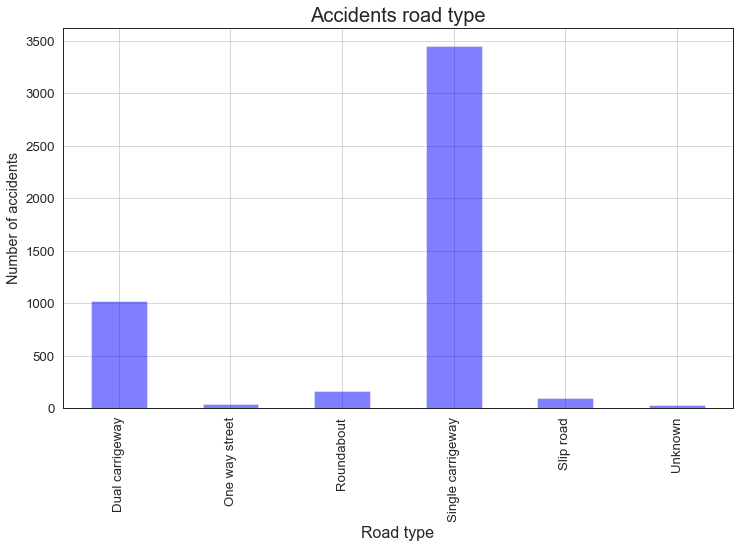

In [64]:
#accidents per road type
road_type=major_accidents.groupby(major_accidents['road_type']).count().number_of_vehicles


#plot accidents by road type
road_type.plot(kind='bar', figsize=(12,7), color='blue', alpha=0.5)

#title and x, y labels
plt.title('Accidents road type', fontsize=20)
plt.xlabel('Road type', fontsize=16)
plt.ylabel('Number of accidents')
plt.grid(True)

The great number of major accidents occur in single carriageway so one possible solution could be transformed them in dual
carriageway.

In [65]:
#replace special conditions integer to string
special_condition_to_string={0:'none', 1:'Auto traffic out', 2:'Auto signal part defective', 3:'Road sign or marking defective',
                             4:'Roadworks', 5:'Road surface defective', 6:'Oil or diesel', 7:'Mud', -1:'Data missing', 9:'Unknown'}
major_accidents['special_conditions_at_site'].replace(special_condition_to_string, inplace=True)
major_accidents['special_conditions_at_site'].head()

11              none
136             none
173             none
187             none
212    Oil or diesel
Name: special_conditions_at_site, dtype: object

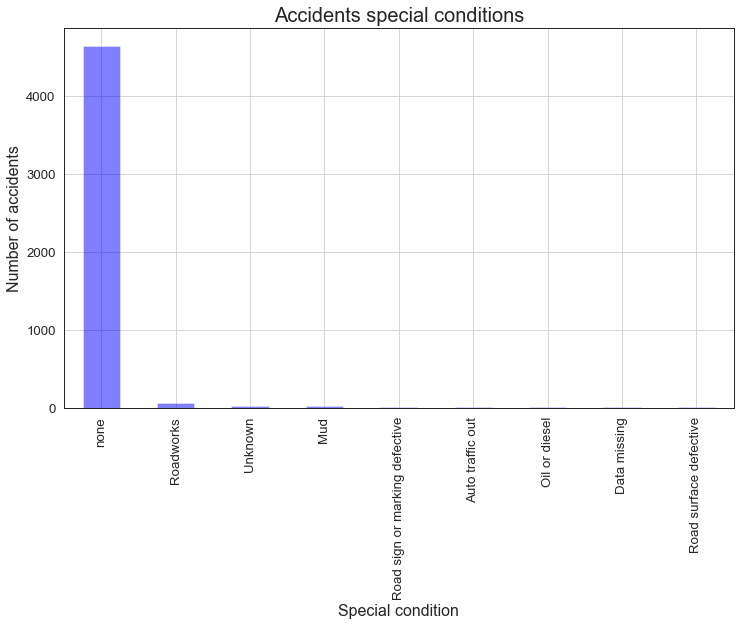

In [66]:

#plot accidents by special conditions road
major_accidents['special_conditions_at_site'].value_counts().plot(kind='bar', figsize=(12,7), color='blue', alpha=0.5)

#title and x, y labels
plt.title('Accidents special conditions', fontsize=20)
plt.xlabel('Special condition', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.grid(True)

This graph shows that no special condition in the road affected the accidents.

For futher more investigation is necessary to clean the data because although the dataframe doesn't have null values when
we analyzed in depth some columns indicate unknown values  with -1, 9 or 99.

In [67]:
import numpy as np
#replace -1, 9, 99 with null
data = data.replace(-1, np.nan)

data['speed_limit'] = data['speed_limit'].replace(99, np.nan)
data['junction_detail'] = data['junction_detail'].replace(99, np.nan)

data['road_type'] = data['road_type'].replace(9, np.nan)
data['pedestrian_crossing_human_control'] = data['pedestrian_crossing_human_control'].replace(9, np.nan)
data['pedestrian_crossing_physical_facilities'] = data['pedestrian_crossing_physical_facilities'].replace(9, np.nan)
data['weather_conditions'] = data['weather_conditions'].replace(9, np.nan)
data['road_surface_conditions'] = data['road_surface_conditions'].replace(9, np.nan)
data['special_conditions_at_site'] = data['special_conditions_at_site'].replace(9, np.nan)
data['carriageway_hazards'] = data['carriageway_hazards'].replace(9, np.nan)
data.isnull().sum()


accident_index                                     0
accident_reference                                 0
location_easting_osgr                             14
location_northing_osgr                            14
longitude                                         14
latitude                                          14
police_force                                       0
accident_severity                                  0
number_of_vehicles                                 0
number_of_casualties                               0
date                                               0
local_authority_district                         991
local_authority_ons_district                       0
local_authority_highway                            0
first_road_class                                   0
first_road_number                                  0
road_type                                       2006
speed_limit                                       12
junction_detail                               

In [68]:
# remove junction control
data.drop('junction_control', axis=1, inplace=True)

#remove null values
data.dropna(inplace=True)

In [74]:
serious = (data['number_of_casualties']>=3)
data['serious'] = np.where(serious, 'Yes', 'No')

In [75]:
#replace for string
data['road_type'].replace({1:'Roundabout', 2:'One way street', 3:'Dual carrigeway', 6:'Single carrigeway', 7:'Slip road',
                           9:'Unknown'}, inplace=True)
data['junction_detail'].replace({0:'Not a junction', 1:'Roundabout',2:'Mini-roundabout',3:'T junction',5:'Slip road',
                                 6:'Crossroads', 7:'More than 4 arms', 8: 'Private drive or entrance',9:'Other junction'},
                                inplace=True)
data['pedestrian_crossing_human_control'].replace({0:'No control',1:'Control by school patrol',2:'Control by other person'},
                                                  inplace=True)
data['pedestrian_crossing_physical_facilities'].replace({0:'No physical crossing facility',1:'Zebra',4:'Pelican,puffin or similar facilities',
                                                        5:'Pedestrian phase at traffic signal junction',7:'Footbridge or subway',
                                                         8:'Central refuge'})
data['light_conditions'].replace({1:'Daylight', 4:'Darkness: lights lit',5:'Darkness: lights unlit',6:'Darkness: no lightning',
                                  7:'Darkness: lightning unknown'}, inplace=True)
data['weather_conditions'].replace({1:'Fine no high winds',2:'Raining no winds',3:'Snowing no high winds',4:'Fine + high winds',
                                    5:'Raining + high winds',6:'Snowing + high winds',7:'Fog or mist',8:'Other'}, inplace=True)
data['road_surface_conditions'].replace({1:'Dry', 2:'Wet or damp',3:'Snow', 4:'Frost or ice',5:'Flood over 3cm'},
                                         inplace=True)
data['urban_or_rural_area'].replace({1:'Urban', 2:'Rural'},inplace=True)

In [109]:
def plot_features(column):
    table_perc = data.groupby('serious')[column].value_counts(sort=False)*100
    table_perc = table_perc.reset_index(name="percentage")

    #sns.barplot(x = column, y = 'percentage', hue = 'serious', data = table_perc, palette = 'hls')
    #labels = [i for i in range(0,105,5)]
    #plt.yticks(labels)
    #plt.ylabel('Accidents Percentage')
    #plt.grid(True)
    return table_perc.head()

In [110]:
plot_features('road_type')

,serious,road_type,percentage
0,No,Dual carrigeway,1071200
1,No,One way street,145200
2,No,Roundabout,458900
3,No,Single carrigeway,5412000
4,No,Slip road,113100
